# k-means clustering
* 각 군집에 할당된 포인트들의 평균 좌표를 이용해 중심점을 반복적으로 업데이트
* step1: 각 데이터 포인트 i에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 군집 할당
* step2: 할당된 군집을 기반으로 새로운 중심 계산, 중심점은 군집 내부 점들 좌표의 평균으로 함
* step3: 각 클러스터의 할당이 바뀌지 않을 때까지 반복

### 점과 점 사이의 거리 측정
* manhattan distance: 각 축에 대해 수직으로만 이동하여 계산하는 거리 측정 방식
* euclidean distance: 점과 점 사이의 가장 짧은 거리를 계산하는 거리 측정 방식

### 최적의 k를 찾는 방법(k값을 설정하는 방법)
* 군집의 개수 k는 사용자가 임의로 정하는 것이기 때문에 데이터에 최적화된 k를 찾기 어려움
* k를 설정하는 대표적인 방법은 elbow method, silhouette method 등이 있음

#### elbow method
* 군집 간 분산(bss; between cluster sum of squares)과 전체 분산(tss = bss + wss)의 비율
    - ratio = BSS / TSS = (TSS - WSS) / TSS
* wss(within cluster sum of squares): 객체 xi와 군집 j의 중심 cj와의 거리 제곱합
* tss(total sum of squares): 객체 xi와 전체 데이터의 중심 c와의 거리 제곱합
* wss를 통해 비율의 한계 비용이 줄어드는 지점이 최적의 클러스터 개수(분산 비율의 증가분이 줄어드는 지점이 최종 클러스터 개수)

#### silhouette method
* 객체와 그 객체가 속한 군집의 데이터들과의 비 유사성을 계산하는 방법으로 elbow method에 비해 상대적으로 간단함
* a(i): 객체 i와 그 객체가 속한 군집의 데이터들과의 비 유사성
* b(i): 그 객체가 속하지 않은 다른 군집의 모든 데이터들과의 비 유사성의 최솟값(가장 가까운 군집)
* a(i)와 b(i)가 정의되었을 때, 실루엣 s(i) = (b(i) - a(i)) / max[a(i), b(i)] (where -1 <= s(i) <= 1)
* s(i)의 값이 1에 가까울수록 객체 i는 올바른 클러스터에 분류됨
* k를 증가시켜가며 평균 실루엣 값, 즉 silhouette coefficient가 최대가 되는 k를 선택

### k-means clustering의 단점
* 초기 중심 값에 민감한 반응을 보임
* 노이즈와 아웃라이어에 민감함
* 군집의 개수 k를 설정하는 것에 어려움

# k-medoids clustering
* k-means clustering의 변형으로, 군집의 무게 중심을 구하기 위해 데이터의 평균 대신 중간점(medoids)을 사용(k-means보다 이상치에 강건한 성능을 보임)
* k-means보다 k-medoids의 중앙점이 더 명확함(더 좋은 군집을 형성하게 될 가능성을 높임)

차이 | k-means | k-medoids
- | - | -
중심 | 군집의 평균 값 | 군집 내 중앙 데이터
이상치 | 이상치가 전체 거리 평균 값에 영향을 주어 이상치에 민감함 | k-means보단 덜 민감함
계산 시간 | 상대적으로 적은 시간이 소요 | 데이터 간 모든 거리 비용을 반복하여 계산해야 하므로 상대적으로 많은 시간이 소요
파라미터 | 군집의 개수 k, 초기 중심점
군집 모양 | 원형의 군집이 아닌 경우 군집화를 이루기 어려움

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# iris 데이터를 활용하여 kmeans clustering

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
x = iris.data[:, :2]
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [9]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'sepal width')

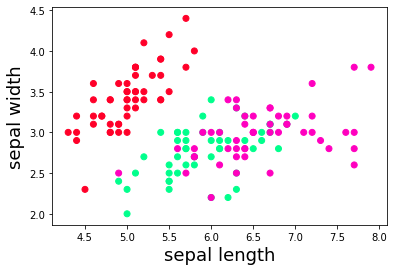

In [10]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'gist_rainbow')
plt.xlabel('sepal length', fontsize = 18)
plt.ylabel('sepal width', fontsize = 18)

In [11]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state = 21)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [12]:
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'predicted')

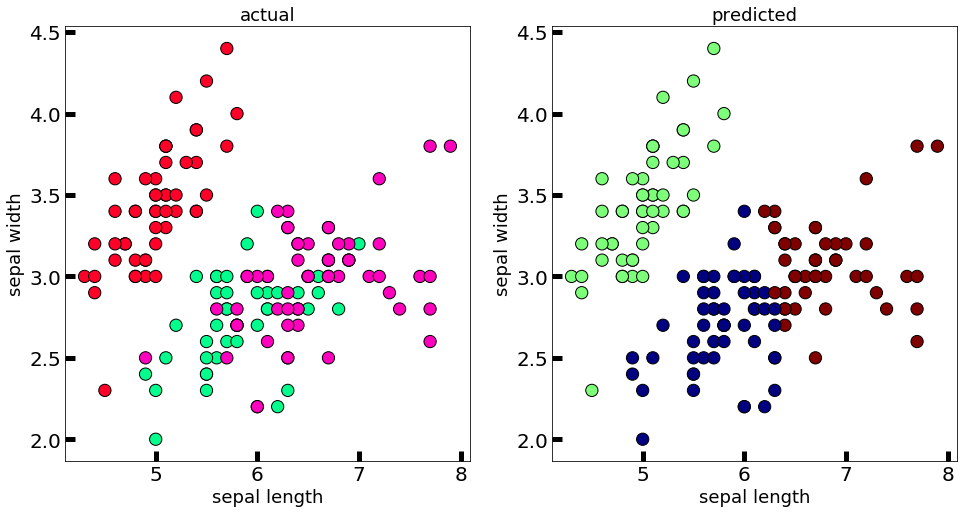

In [16]:
new_labels = km.labels_

# plot the identified clusters and compare with the answers

fig, axes = plt.subplots(1, 2, figsize = (16, 8))

axes[0].scatter(x[:, 0], x[:, 1], c = y, cmap = 'gist_rainbow', edgecolor = 'k', s = 150)
axes[1].scatter(x[:, 0], x[:, 1], c = new_labels, cmap = 'jet', edgecolor = 'k', s = 150)

axes[0].set_xlabel('sepal length', fontsize = 18)
axes[0].set_ylabel('sepal width', fontsize = 18)
axes[1].set_xlabel('sepal length', fontsize = 18)
axes[1].set_ylabel('sepal width', fontsize = 18)

axes[0].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[1].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)

axes[0].set_title('actual', fontsize = 18)
axes[1].set_title('predicted', fontsize = 18)

# 2차원의 가상 데이터를 활용하여 kmeans clustering

In [28]:
from sklearn.datasets import make_blobs

# create dataset

x, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

print(x)
print(y)

[[ 2.60509732  1.22529553]
 [ 0.5323772   3.31338909]
 [ 0.802314    4.38196181]
 [ 0.5285368   4.49723858]
 [ 2.61858548  0.35769791]
 [ 1.59141542  4.90497725]
 [ 1.74265969  5.03846671]
 [ 2.37533328  0.08918564]
 [-2.12133364  2.66447408]
 [ 1.72039618  5.25173192]
 [ 3.1368855   1.56592763]
 [-0.37494566  2.38787435]
 [-1.84562253  2.71924635]
 [ 0.72144399  4.08475018]
 [ 0.16117091  4.53517846]
 [-1.99912714  2.71285741]
 [-1.47804153  3.2093591 ]
 [ 1.8706766   0.77797407]
 [-1.5933443   2.76898682]
 [ 2.03562611  0.31361691]
 [ 0.64003985  4.12401075]
 [ 2.4411628   1.30941574]
 [ 1.13280393  3.87673946]
 [ 1.04829186  5.03092408]
 [-1.26637157  2.62998828]
 [ 2.31690585  0.81189049]
 [ 2.36230721  1.358767  ]
 [ 1.2091013   3.53566548]
 [-2.54224625  3.95012869]
 [ 1.4815332   0.67875364]
 [-1.59487886  3.48632794]
 [-1.82556205  2.7989214 ]
 [-1.13374003  2.68467271]
 [-1.758702    3.158623  ]
 [ 0.3498724   4.69253251]
 [ 1.68548602  1.66917096]
 [ 2.989047    1.35068599]
 

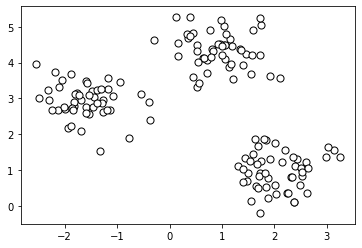

In [29]:
# plot

plt.scatter(x[:, 0], x[:, 1], c = 'white', marker = 'o', edgecolor = 'black', s = 50)
plt.show()

#### k = 3으로 할 경우

In [30]:
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(x)
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2])

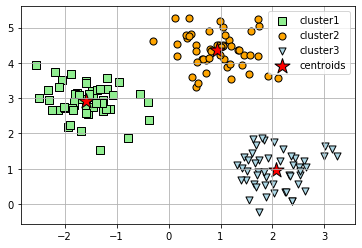

In [31]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 50, c = 'lightgreen', marker = 's', edgecolor = 'black', label = 'cluster1')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 50, c = 'orange', marker = 'o', edgecolor = 'black', label = 'cluster2')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolor = 'black', label = 'cluster3')

# plot the centroids

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', 
            edgecolor = 'black', label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

#### k = 4로 할 경우

In [32]:
km = KMeans(n_clusters = 4, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(x)
y_km

array([2, 1, 1, 1, 3, 1, 1, 3, 0, 1, 2, 0, 0, 1, 1, 0, 0, 3, 0, 3, 1, 2,
       1, 1, 0, 3, 2, 1, 0, 3, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 3,
       2, 3, 0, 1, 0, 1, 2, 1, 1, 3, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 3, 3, 1, 1, 2, 2, 2, 0,
       0, 3, 3, 1, 3, 1, 3, 1, 0, 0, 3, 2, 2, 2, 0, 3, 3, 1, 0, 1, 1, 1,
       0, 1, 3, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 1, 0, 2, 0, 1, 1, 3, 3, 0, 0, 0, 0, 3, 3])

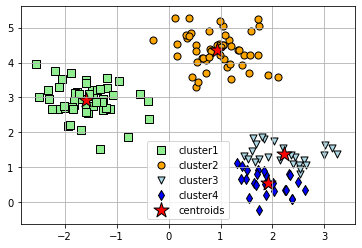

In [33]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 50, c = 'lightgreen', marker = 's', edgecolor = 'black', label = 'cluster1')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 50, c = 'orange', marker = 'o', edgecolor = 'black', label = 'cluster2')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolor = 'black', label = 'cluster3')
plt.scatter(x[y_km == 3, 0], x[y_km == 3, 1], s = 50, c = 'blue', marker = 'd', edgecolor = 'black', label = 'cluster4')

# plot the centroids

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', 
            edgecolor = 'black', label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

#### 최적의 k 찾기

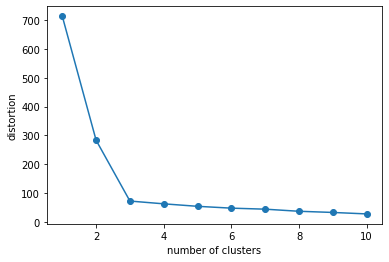

In [34]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

k = 3이 최적

# 문자열을 활용하여 k-means clustering

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [64]:
documents = ["This little kitty came to play when I was eating at a restaurant.","hello kitty is my favorite character",
             "Merley has the best squooshy kitten belly.","Is Google translator so good?","google google"
             "google Translate app is incredible.","My dog s name is Kong","dog dog dog","cat cat"
             "If you open 100 tab in google you get a smiley face.","Kong is a very cute and lovely dog",
             "Best cat photo I've ever taken.","This is a cat house"
             "Climbing ninja cat kitty.","What's your dog's name?","Cat s paws look like jelly",
             "Impressed with google map feedback.","I want to join google","You have to wear a collar when you walk the dog",
             "Key promoter extension for google Chrome.","Google is the best company","Google researcher"]
documents

['This little kitty came to play when I was eating at a restaurant.',
 'hello kitty is my favorite character',
 'Merley has the best squooshy kitten belly.',
 'Is Google translator so good?',
 'google googlegoogle Translate app is incredible.',
 'My dog s name is Kong',
 'dog dog dog',
 'cat catIf you open 100 tab in google you get a smiley face.',
 'Kong is a very cute and lovely dog',
 "Best cat photo I've ever taken.",
 'This is a cat houseClimbing ninja cat kitty.',
 "What's your dog's name?",
 'Cat s paws look like jelly',
 'Impressed with google map feedback.',
 'I want to join google',
 'You have to wear a collar when you walk the dog',
 'Key promoter extension for google Chrome.',
 'Google is the best company',
 'Google researcher']

In [65]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x = vectorizer.fit_transform(documents)
x

<19x55 sparse matrix of type '<class 'numpy.float64'>'
	with 74 stored elements in Compressed Sparse Row format>

In [66]:
true_k = 3
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [68]:
model.labels_

array([0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1])

In [69]:
[x for x, y in zip(documents, model.labels_) if y == 0]     # 대부분 kitty 들어간 문장

['This little kitty came to play when I was eating at a restaurant.',
 'hello kitty is my favorite character',
 'Merley has the best squooshy kitten belly.',
 "Best cat photo I've ever taken.",
 'This is a cat houseClimbing ninja cat kitty.',
 'Cat s paws look like jelly',
 'Google is the best company']

In [70]:
[x for x, y in zip(documents, model.labels_) if y == 1]     # 대부분 google 들어간 문장

['Is Google translator so good?',
 'google googlegoogle Translate app is incredible.',
 'cat catIf you open 100 tab in google you get a smiley face.',
 'Impressed with google map feedback.',
 'I want to join google',
 'Key promoter extension for google Chrome.',
 'Google researcher']

In [71]:
[x for x, y in zip(documents, model.labels_) if y == 2]     # 대부분 dog 들어간 문장

['My dog s name is Kong',
 'dog dog dog',
 'Kong is a very cute and lovely dog',
 "What's your dog's name?",
 'You have to wear a collar when you walk the dog']

In [72]:
y = vectorizer.transform(['chrome browser to open.'])
prediction = model.predict(y)
print(prediction)

y = vectorizer.transform(['i want to have a dog'])
prediciton = model.predict(y)
print(prediction)

y = vectorizer.transform(['my cat is hungry.'])
prediction = model.predict(y)
print(prediction)

[1]
[1]
[0]
